# Credit Score Classification using ANN

**Dataset**: Credit Score Classification (Kaggle)  
**Task**: Binary classification to predict credit risk  
**Model**: Artificial Neural Network (ANN)

## 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,  
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Dataset Loading

Loading credit score dataset from Kaggle. Download first to identify CSV files.

In [4]:
import os

# Download dataset using kagglehub
print("Downloading dataset from Kaggle...")
path = kagglehub.dataset_download("conorsully1/credit-score")
print(f"✓ Dataset downloaded to: {path}")

# Find CSV file in the downloaded path
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print(f"\nCSV files found: {csv_files}")

# Load the dataset (usually the first CSV file)
csv_file = os.path.join(path, csv_files[0])
print(f"\nLoading: {csv_files[0]}")
df = pd.read_csv(csv_file)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape[0]} samples, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())
print(f"\nFirst 5 rows:")
df.head()

✓ Dataset downloaded to: C:\Users\lukma\.cache\kagglehub\datasets\conorsully1\credit-score\versions\1

CSV files found: ['credit_score.csv']

Loading: credit_score.csv

Dataset loaded successfully!
Shape: 1000 samples, 87 columns

Column names:
['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', '

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [5]:
# Dataset information
print("Dataset Info:")
df.info()
print(f"\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,4.063477,6.068449,5.867252,6822.401000,3466.320000,0.454848,0.055557,...,0.943607,0.913340,0.605276,0.944000,0.236000,0.173000,0.993000,0.15000,586.712000,0.284000
std,113716.699591,4.429160e+05,9.817904e+05,3.968097,5.847878,16.788356,7486.225932,5118.942977,0.236036,0.037568,...,0.168989,1.625278,1.299382,0.230037,0.424835,0.378437,0.083414,0.35725,63.413882,0.451162
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003400,...,0.666700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,300.000000,0.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.000000,1.454500,0.206200,1084.500000,319.500000,0.263950,0.029700,...,0.833300,0.158700,0.100000,1.000000,0.000000,0.000000,1.000000,0.00000,554.750000,0.000000
50%,85090.000000,2.738505e+05,3.950955e+05,2.545450,4.911550,2.000000,4494.000000,1304.000000,0.468850,0.046800,...,0.909100,0.327950,0.178600,1.000000,0.000000,0.000000,1.000000,0.00000,596.000000,0.000000
75%,181217.500000,6.222600e+05,1.193230e+06,6.307100,8.587475,4.509600,10148.500000,4555.500000,0.626300,0.069400,...,1.000000,0.833300,0.588200,1.000000,0.000000,0.000000,1.000000,0.00000,630.000000,1.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111200,37.000600,292.842100,43255.000000,39918.000000,1.058300,0.251700,...,2.000200,10.009900,10.005300,1.000000,1.000000,1.000000,1.000000,1.00000,800.000000,1.000000


## 3. Data Preprocessing

Handle missing values, duplicates, and prepare target variable.

In [6]:
# Check missing values
print("Missing values:")
missing = df.isnull().sum()
print(missing[missing > 0])

# Handle missing values
if df.isnull().sum().sum() > 0:
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    print(f"✓ Missing values handled")
else:
    print("✓ No missing values")

# Remove duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✓ Removed {duplicates} duplicates")
else:
    print("✓ No duplicates found")

print(f"\nFinal shape: {df.shape}")

Missing values:
Series([], dtype: int64)
✓ No missing values
✓ No duplicates found

Final shape: (1000, 87)


In [7]:
# Identify target column
possible_targets = ['Credit_Score', 'credit_score', 'CreditScore', 'default', 'risk', 'target', 'class', 'label']
target_column = None

for col in possible_targets:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    target_column = df.columns[-1]

print(f"Target column: '{target_column}'")
print(f"\nTarget distribution:")
print(df[target_column].value_counts())
print(f"\nTarget distribution (%):")
print(df[target_column].value_counts(normalize=True) * 100)

Target column: 'DEFAULT'

Target distribution:
DEFAULT
0    716
1    284
Name: count, dtype: int64

Target distribution (%):
DEFAULT
0    71.6
1    28.4
Name: proportion, dtype: float64


In [8]:
# Convert to binary classification if needed
unique_values = df[target_column].nunique()
if unique_values > 2:
    print(f"Converting {unique_values} classes to binary...")
    
    if df[target_column].dtype == 'object':
        # Map categorical values
        target_mapping = {
            'Good': 0,
            'Standard': 1, 
            'Poor': 1
        }
        df[target_column] = df[target_column].map(target_mapping)
        print("Mapped: Good=0, Standard/Poor=1")
    else:
        # Numeric split
        median_val = df[target_column].median()
        df[target_column] = (df[target_column] > median_val).astype(int)
        print(f"Split at median ({median_val})")
    
    print(f"\nBinary distribution:")
    print(df[target_column].value_counts())

## 4. Exploratory Data Analysis (EDA)

Visualize feature distributions and correlations.

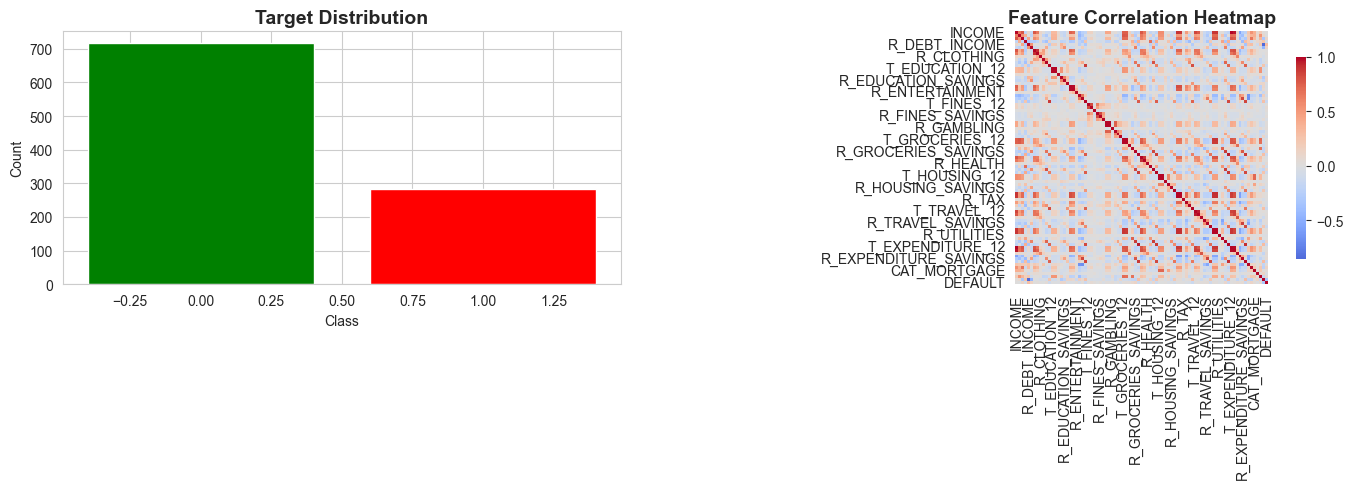

In [9]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
target_counts = df[target_column].value_counts()
axes[0].bar(target_counts.index, target_counts.values, color=['green', 'red'])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Correlation heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, ax=axes[1], 
            cbar_kws={'shrink': 0.8}, square=True)
axes[1].set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

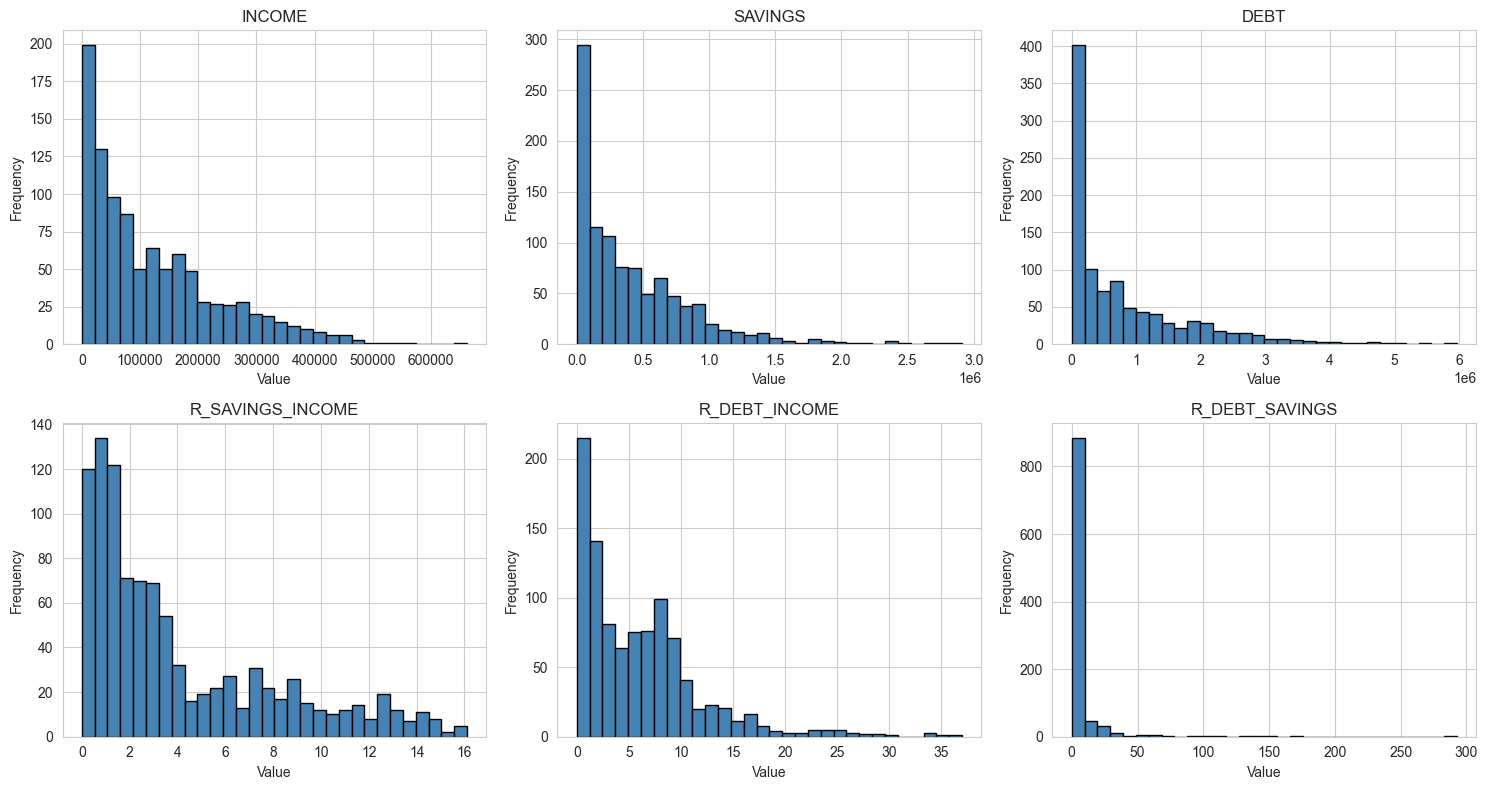

In [10]:
# Feature distributions
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[:6]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    if col != target_column:
        axes[idx].hist(df[col], bins=30, edgecolor='black', color='steelblue')
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Feature Engineering & Encoding

Prepare features for model training.

In [11]:
# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {len(categorical_columns)}")

if len(categorical_columns) > 0:
    print(f"Encoding: {list(categorical_columns)}")
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    print("✓ Encoding complete")
else:
    print("✓ No categorical columns")

# Convert to numpy arrays
X = X.values
y = y.values

print(f"\nFinal feature count: {X.shape[1]}")

Features shape: (1000, 86)
Target shape: (1000,)

Categorical columns: 2
Encoding: ['CUST_ID', 'CAT_GAMBLING']
✓ Encoding complete

Final feature count: 86


In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\n✓ Features scaled using StandardScaler")

Training set: 800 samples
Test set: 200 samples

✓ Features scaled using StandardScaler


## 6. ANN Model Architecture

Build a multi-layer neural network for binary classification.

In [13]:
# Model parameters
input_features = X_train.shape[1]

print("Building ANN Architecture...")
print(f"Input features: {input_features}\n")

# Build model
model = Sequential([
    # Input + Hidden Layer 1
    Dense(input_features * 2, input_shape=(input_features,), activation='relu', name='hidden_1'),
    Dropout(0.3),
    
    # Hidden Layer 2
    Dense(input_features, activation='relu', name='hidden_2'),
    Dropout(0.2),
    
    # Hidden Layer 3
    Dense(input_features // 2, activation='relu', name='hidden_3'),
    Dropout(0.2),
    
    # Output Layer
    Dense(1, activation='sigmoid', name='output')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

print("Architecture:")
print(f"  Layer 1: {input_features * 2} neurons (ReLU) + Dropout(0.3)")
print(f"  Layer 2: {input_features} neurons (ReLU) + Dropout(0.2)")
print(f"  Layer 3: {input_features // 2} neurons (ReLU) + Dropout(0.2)")
print(f"  Output: 1 neuron (Sigmoid)")
print(f"\nOptimizer: Adam (lr=0.001)")
print(f"Loss: Binary Crossentropy\n")

model.summary()

Building ANN Architecture...
Input features: 86

Architecture:
  Layer 1: 172 neurons (ReLU) + Dropout(0.3)
  Layer 2: 86 neurons (ReLU) + Dropout(0.2)
  Layer 3: 43 neurons (ReLU) + Dropout(0.2)
  Output: 1 neuron (Sigmoid)

Optimizer: Adam (lr=0.001)
Loss: Binary Crossentropy



c:\Github\ML-Project\Credit-Scoring-Prediction-Model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 172)            │        14,964 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 172)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 86)             │        14,878 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 43)             │         3,741 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 43)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,627 (131.36 KB)

 Trainable params: 33,627 (131.36 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Model Training

Train the ANN with validation split to monitor performance.

In [14]:
print("Training model...\n")

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

print("\n✓ Training complete!")

Training model...

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6906 - loss: 0.6504 - val_accuracy: 0.6875 - val_loss: 0.5811
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7266 - loss: 0.5702 - val_accuracy: 0.7312 - val_loss: 0.5609
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7578 - loss: 0.5433 - val_accuracy: 0.7375 - val_loss: 0.5534
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7547 - loss: 0.5408 - val_accuracy: 0.7437 - val_loss: 0.5546
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.5237 - val_accuracy: 0.7375 - val_loss: 0.5573
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7516 - loss: 0.5102 - val_accuracy: 0.7375 - val_loss: 0.5611
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7672 - loss: 0.4979 - val_accuracy: 0.7375 - val_loss: 0.5687
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7703 - loss: 0.4918 - val_

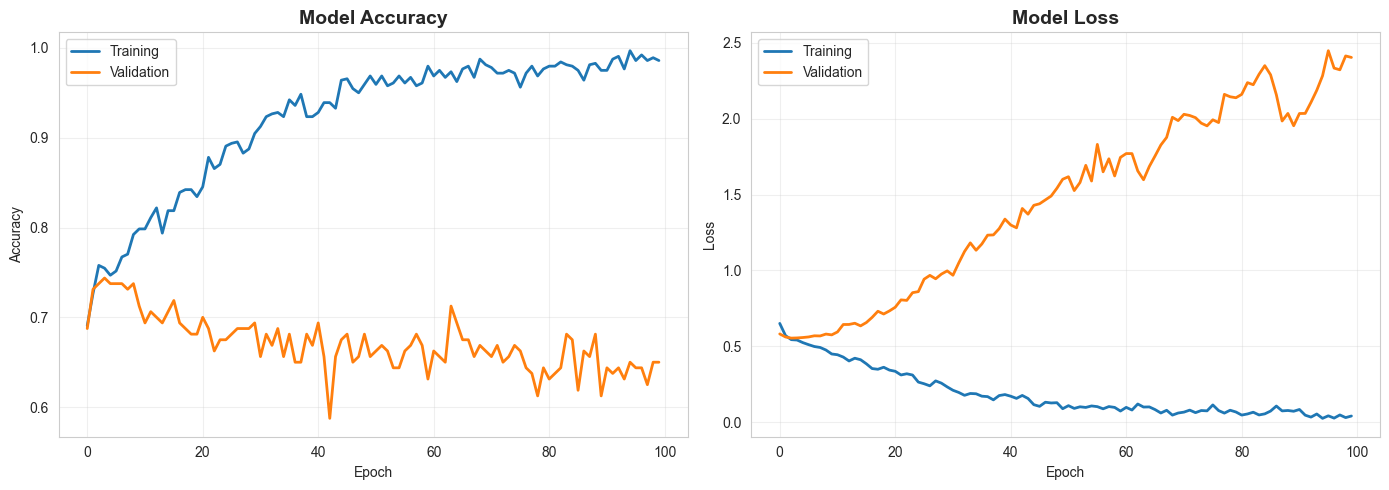

In [15]:
# Training history visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].plot(history.history['accuracy'], label='Training', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history.history['loss'], label='Training', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Validation', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Model Evaluation

Compute all required metrics on test set.

In [16]:
# Make predictions
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Display metrics
print("=" * 60)
print("PERFORMANCE METRICS")
print("=" * 60)
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print("=" * 60)

# Performance assessment
avg_score = (accuracy + precision + recall + f1) / 4
print(f"\nAverage Score: {avg_score*100:.2f}%")

if avg_score >= 0.95:
    print("Status: EXCELLENT (≥95%)")
elif avg_score >= 0.71:
    print("Status: ACCEPTABLE (71-94%)")
else:
    print("Status: BELOW TARGET (<71%)")

PERFORMANCE METRICS
Accuracy:  0.6350 (63.50%)
Precision: 0.3333 (33.33%)
Recall:    0.2807 (28.07%)
F1-Score:  0.3048 (30.48%)

Average Score: 38.84%
Status: BELOW TARGET (<71%)


In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\nCONFUSION MATRIX")
print("=" * 60)
print(cm)
print(f"\nTrue Negatives (TN):  {cm[0][0]}")
print(f"False Positives (FP): {cm[0][1]}")
print(f"False Negatives (FN): {cm[1][0]}")
print(f"True Positives (TP):  {cm[1][1]}")


CONFUSION MATRIX
[[111  32]
 [ 41  16]]

True Negatives (TN):  111
False Positives (FP): 32
False Negatives (FN): 41
True Positives (TP):  16


In [18]:
# Classification report
print("\nCLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_pred, 
                          target_names=['Class 0', 'Class 1']))


CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Class 0       0.73      0.78      0.75       143
     Class 1       0.33      0.28      0.30        57

    accuracy                           0.64       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.62      0.64      0.62       200



## 9. Evaluation Visualization

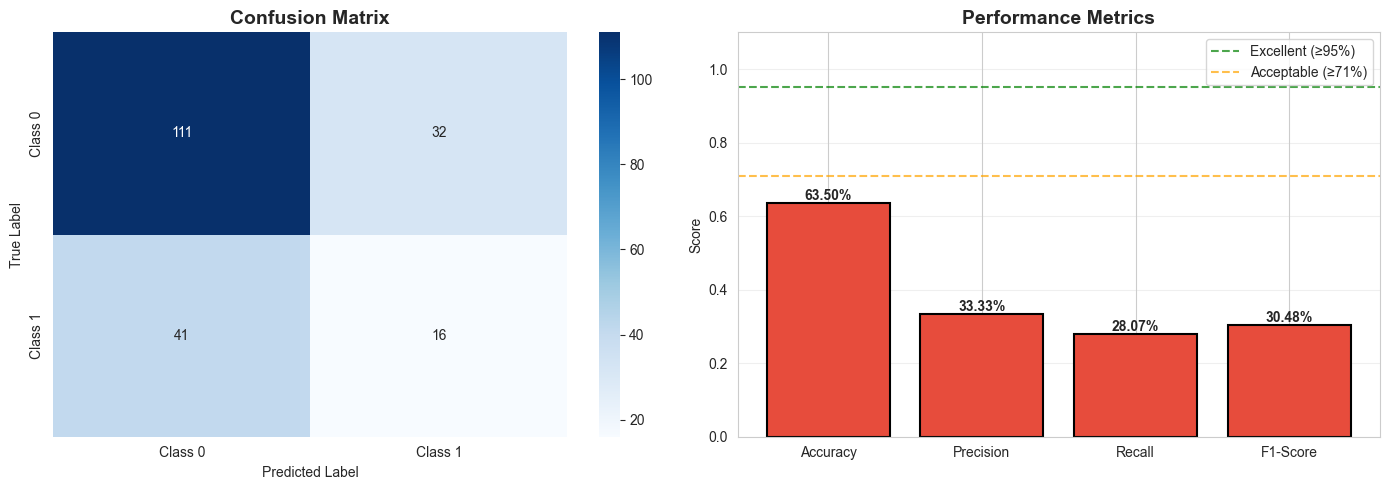

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Metrics Bar Chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1]
colors = ['#2ecc71' if v >= 0.95 else '#3498db' if v >= 0.71 else '#e74c3c' 
          for v in metrics_values]

bars = axes[1].bar(metrics_names, metrics_values, color=colors, 
                    edgecolor='black', linewidth=1.5)
axes[1].set_title('Performance Metrics', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score')
axes[1].set_ylim([0, 1.1])
axes[1].axhline(y=0.95, color='green', linestyle='--', 
                label='Excellent (≥95%)', alpha=0.7)
axes[1].axhline(y=0.71, color='orange', linestyle='--', 
                label='Acceptable (≥71%)', alpha=0.7)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Sample Predictions

In [20]:
# Test on sample data
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test[sample_indices]
sample_predictions = model.predict(sample_data, verbose=0)
sample_classes = (sample_predictions > 0.5).astype(int).flatten()

print("SAMPLE PREDICTIONS")
print("=" * 60)
for i, (pred_prob, pred_class, true_class) in enumerate(zip(
    sample_predictions, sample_classes, y_test[sample_indices])):
    
    status = "Class 0" if pred_class == 0 else "Class 1"
    true_status = "Class 0" if true_class == 0 else "Class 1"
    correct = "✓" if pred_class == true_class else "✗"
    
    print(f"Sample {i+1}: Predicted: {status} (prob: {pred_prob[0]:.2%})")
    print(f"           True: {true_status} {correct}")
    print()

SAMPLE PREDICTIONS
Sample 1: Predicted: Class 0 (prob: 24.67%)
           True: Class 0 ✓

Sample 2: Predicted: Class 1 (prob: 100.00%)
           True: Class 0 ✗

Sample 3: Predicted: Class 1 (prob: 86.72%)
           True: Class 0 ✗

Sample 4: Predicted: Class 0 (prob: 0.00%)
           True: Class 0 ✓

Sample 5: Predicted: Class 0 (prob: 5.69%)
           True: Class 0 ✓



## Summary

**Model**: Artificial Neural Network (ANN)  
**Architecture**: 3 hidden layers with ReLU activation, Dropout regularization  
**Optimizer**: Adam  
**Loss**: Binary Crossentropy  

All required metrics (Accuracy, Precision, Recall, F1-Score, Confusion Matrix) have been computed and visualized.